# [WUM] PD3 
## Kacper Kurowski

Wpierw wczytajmy dane

In [3]:
import os 
os.getcwd()

'/home/kurowskik'

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme(style="darkgrid")

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import requests

In [5]:
aus_wheather = pd.read_csv( "/home/kurowskik/kaggle/weatherAUS.csv", sep = ",", header=0)


In [4]:
aus_wheather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Możemy szybko zapoznać się z danymi

In [7]:
from pandas_profiling import ProfileReport

In [33]:
profile = ProfileReport(aus_wheather, title="Pandas Profiling Report")

In [1]:
#profile.to_notebook_iframe() #Jak chcemy zobaczyć

Możemy zauważyć, że zmienne Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday i RainTomorrow mają wartości nieliczbowe. Dlatego postaramy się zakodować je przy pomocy liczb. Możemy również zauważyć, że jest dużo wierszy z Evaporation i Sunshine na NaN. Podobnie Cloud9am i Cloud3pm. Z tego powodu usuniemy te kolumny.

In [6]:
del aus_wheather["Evaporation"]
del aus_wheather["Sunshine"]
del aus_wheather["Cloud9am"]
del aus_wheather["Cloud3pm"]

In [7]:
direction_to_encoding = {
    "N" : [1.0,0.0,0.0,0.0],
    "NNW" : [0.75,0.25,0.0,0.0],
    "NW" : [0.5,0.5,0.0,0.0],
    "WNW" : [0.25,0.66,0.0,0.0],
    "W" : [0.0,1.0,0.0,0.0],
    "WSW" : [0.0,0.75,0.25,0.0],
    "SW" : [0.0,0.5,0.5,0.0],
    "SSW" : [0.0,0.75,0.66,0.0],
    "S" : [0.0,0.0,1.0,0.0],
    "SSE" : [0.0,0.0,0.75,0.25],
    "SE" : [0.0,0.0,0.5,0.5],
    "ESE" : [0.0,0.0,0.25,0.75],
    "E" : [0.0,0.0,0.0,1.0],
    "ENE" : [0.25,0.0,0.0,0.75],
    "NE" : [0.5,0.0,0.0,0.5],
    "NNE" : [0.75,0.66,0.0,0.25],
    "nan" : [0.0,0.0,0.0,0.0]
}

In [8]:
GustDir = pd.DataFrame( 
    aus_wheather["WindGustDir"].fillna("nan").map(direction_to_encoding).tolist(),
    columns=['WindGustDirN','WindGustDirW','WindGustDirS','WindGustDirE'],
    index = aus_wheather.index)
aus_wheather = aus_wheather.merge(GustDir, left_index=True, right_index=True)

GustDir9am = pd.DataFrame( 
    aus_wheather["WindDir9am"].fillna("nan").map(direction_to_encoding).tolist(),
    columns=['WindDir9amN','WindDir9amW','WindDir9amS','WindDir9amE'],
    index = aus_wheather.index)

aus_wheather = aus_wheather.merge(GustDir9am, left_index=True, right_index=True)
GustDir3pm = pd.DataFrame( 
    aus_wheather["WindDir3pm"].fillna("nan").map(direction_to_encoding).tolist(),
    columns=['WindDir3pmN','WindDir3pmW','WindDir3pmS','WindDir3pmE'],
    index = aus_wheather.index)
aus_wheather = aus_wheather.merge(GustDir3pm, left_index=True, right_index=True)

In [9]:
def encode_dates(x):
    tmp = x.split("-")
    return [float( tmp[0]), float(tmp[1]), float(tmp[2]) ]

In [10]:
dates = pd.DataFrame( 
    aus_wheather['Date'].map( encode_dates).tolist(),
    columns=["Year", "Month", "Day"],
    index = aus_wheather.index)
aus_wheather = aus_wheather.merge(dates, left_index=True, right_index=True)

In [11]:
def encodeRain(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0

In [12]:
aus_wheather['RainTomorrow'] = aus_wheather['RainTomorrow'].map( encodeRain)
aus_wheather['RainToday'] = aus_wheather['RainToday'].map( encodeRain)

In [11]:
aus_wheather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'WindGustDirN', 'WindGustDirW', 'WindGustDirS', 'WindGustDirE',
       'WindDir9amN', 'WindDir9amW', 'WindDir9amS', 'WindDir9amE',
       'WindDir3pmN', 'WindDir3pmW', 'WindDir3pmS', 'WindDir3pmE', 'Year',
       'Month', 'Day'],
      dtype='object')

In [13]:
tmp = aus_wheather['Location'].map( lambda x: sum(bytearray(x, 'utf-8'))+len(x) ) # Kodujemy lokację, niestety nieróżnowartościowo

In [14]:
print( len(pd.unique(aus_wheather['Location'])))
print( len(pd.unique(tmp))) # Niestety kodowanie nie jest różnowartościowe w tym przypadku. Trudno.

49
46


In [15]:
aus_wheather['Location'] = tmp

In [15]:
aus_wheather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,WindDir9amW,WindDir9amS,WindDir9amE,WindDir3pmN,WindDir3pmW,WindDir3pmS,WindDir3pmE,Year,Month,Day
0,2008-12-01,629,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,1.00,0.0,0.00,0.25,0.66,0.00,0.0,2008.0,12.0,1.0
1,2008-12-02,629,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,0.25,0.0,0.00,0.00,0.75,0.25,0.0,2008.0,12.0,2.0
2,2008-12-03,629,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,1.00,0.0,0.00,0.00,0.75,0.25,0.0,2008.0,12.0,3.0
3,2008-12-04,629,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,0.00,0.5,0.50,0.00,0.00,0.00,1.0,2008.0,12.0,4.0
4,2008-12-05,629,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,0.00,0.0,0.75,0.50,0.50,0.00,0.0,2008.0,12.0,5.0


Usuwamy kolumny zakodowane (przy pomocy innych kolumn)

In [16]:
del aus_wheather["Date"]
del aus_wheather["WindGustDir"]
del aus_wheather["WindDir9am"]
del aus_wheather["WindDir3pm"]

In [24]:
aus_wheather.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir9amW,WindDir9amS,WindDir9amE,WindDir3pmN,WindDir3pmW,WindDir3pmS,WindDir3pmE,Year,Month,Day
0,629,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,1.00,0.0,0.00,0.25,0.66,0.00,0.0,2008.0,12.0,1.0
1,629,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,0.25,0.0,0.00,0.00,0.75,0.25,0.0,2008.0,12.0,2.0
2,629,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,1.00,0.0,0.00,0.00,0.75,0.25,0.0,2008.0,12.0,3.0
3,629,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0.00,0.5,0.50,0.00,0.00,0.00,1.0,2008.0,12.0,4.0
4,629,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0.00,0.0,0.75,0.50,0.50,0.00,0.0,2008.0,12.0,5.0


Możemy również popatrzeć na wykresy samodzielnie (może coś sie uda zauważyć)

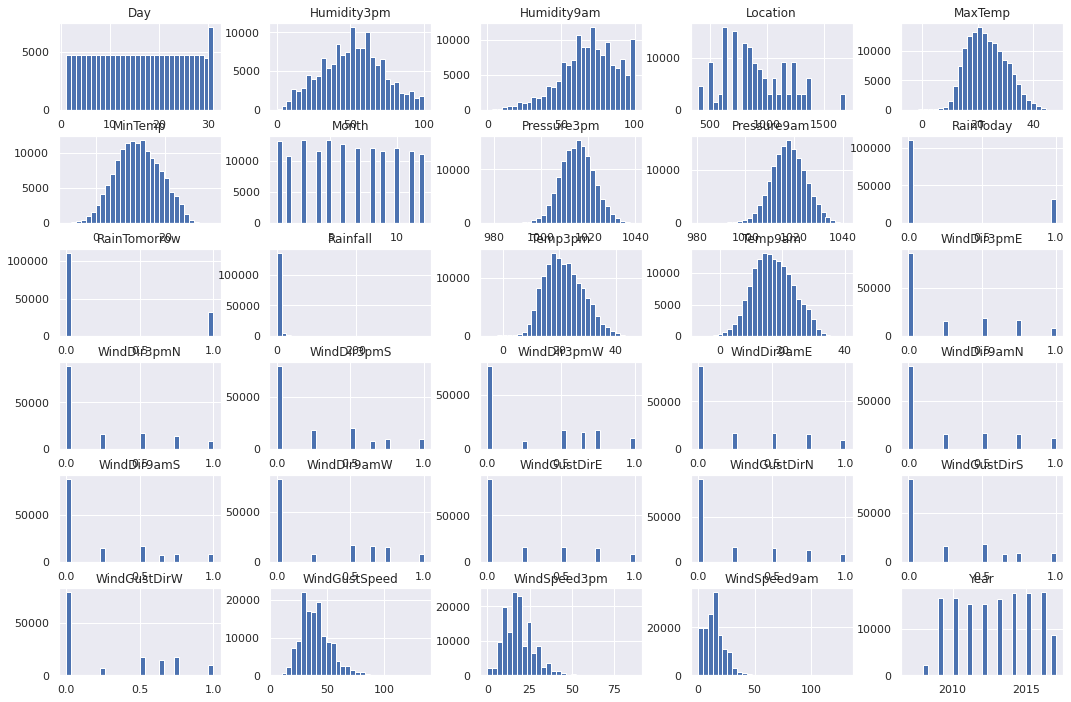

In [25]:
aus_wheather.hist(figsize=(18, 12), bins=30)
plt.show()

In [26]:
import seaborn as sns

In [16]:
aus_wheather.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'WindGustDirN', 'WindGustDirW', 'WindGustDirS',
       'WindGustDirE', 'WindDir9amN', 'WindDir9amW', 'WindDir9amS',
       'WindDir9amE', 'WindDir3pmN', 'WindDir3pmW', 'WindDir3pmS',
       'WindDir3pmE', 'Year', 'Month', 'Day'],
      dtype='object')

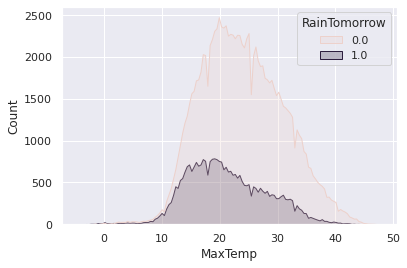

In [18]:
sns.histplot(data=aus_wheather, x="MaxTemp", hue="RainTomorrow", element="poly")

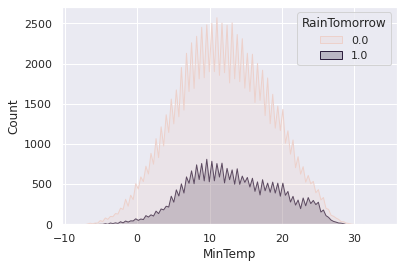

In [133]:
sns.histplot(data=aus_wheather, x="MinTemp", hue="RainTomorrow", element="poly")

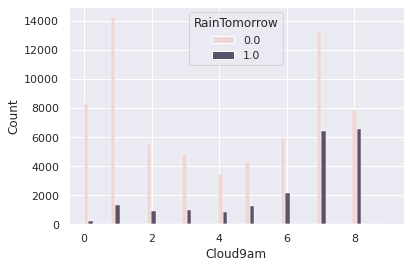

In [134]:
sns.histplot(data=aus_wheather, x="Cloud9am", hue="RainTomorrow", multiple='dodge')

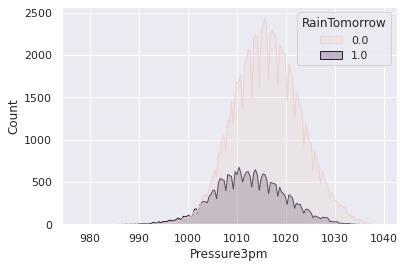

In [137]:
sns.histplot(data=aus_wheather, x="Pressure3pm", hue="RainTomorrow", element="poly")

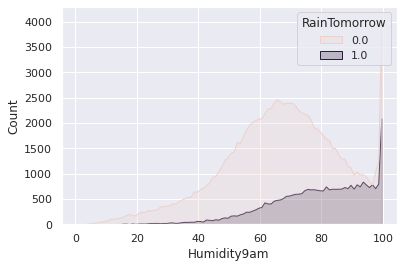

In [138]:
sns.histplot(data=aus_wheather, x="Humidity9am", hue="RainTomorrow", element="poly")

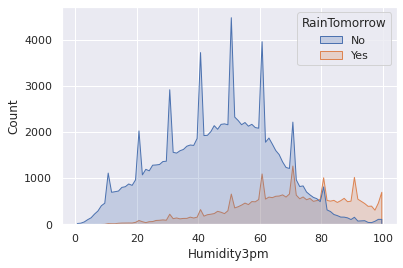

In [33]:
sns.histplot(data=aus_wheather, x="Humidity3pm", hue="RainTomorrow", element="poly")

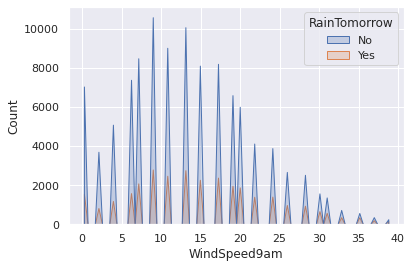

In [43]:
sns.histplot(data=aus_wheather[aus_wheather["WindSpeed9am"]<40], x="WindSpeed9am", hue="RainTomorrow", element="poly")

## Dzielenie zbiorów
Podział na zbiór treningowy (a ten na treningowy i walidacyjny) i na zbiór testowy

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [18]:
X = aus_wheather

In [19]:
#imputer = KNNImputer(n_neighbors=10, weights="uniform") #imputancja powodowała jakieś problemy, wiec po prostu uzupełnimy danie zerami
#imputer.fit_transform(X.sample(n=1000, random_state=1)) 
#X_tr = imputer.transform(X)
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#imp = IterativeImputer(max_iter=10, random_state=0)
#imp.fit(X.sample(n=1000, random_state=1))
#X_tr = imp.transform(X)
X_fill = X.fillna(0)


In [20]:
X_fill["RainTomorrow"] = X_fill["RainTomorrow"].astype( int)
X_fill["RainToday"] = X_fill["RainToday"].astype( int)
y_fill = X_fill["RainTomorrow"]

In [21]:
X_train, X_test, y_train, y_test \
    = train_test_split(X_fill, y_fill, stratify = y_fill, test_size=0.2, random_state=1)
    
X_train, X_val, y_train, y_val \
    = train_test_split(X_train, y_train, stratify = y_train, test_size=0.25, random_state=1)

## AdaBoostClassifier

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [26]:
alf = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.9)
alf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.9, n_estimators=100, random_state=0)

In [27]:
y_val_hat = alf.predict(X_val)
y_test_hat = alf.predict(X_test)

In [28]:
alf.score(X_test, y_test)

1.0

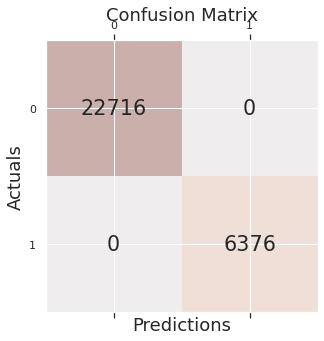

In [31]:
conf_matrix = confusion_matrix(y_true=y_val, y_pred=y_val_hat.round())
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [34]:
print('F1 Score: %.3f' % f1_score(y_test, y_test_hat))

F1 Score: 1.000


In [35]:
print( accuracy_score(y_val, y_val_hat))
print( accuracy_score(y_test, y_test_hat))

1.0
1.0


Teoretycznie AdaBoostClassifer daje idealną predykcję zarówno na zbiorze testowym, jak i na zbiorze walidacyjnym.

## GradientBoostingClassifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
clf = GradientBoostingClassifier(n_estimators=90, learning_rate=0.8,
      max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [40]:
y_val_hat = clf.predict(X_val)
y_test_hat = clf.predict(X_test)

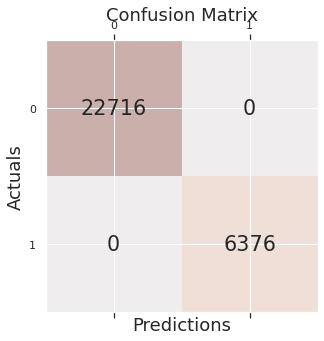

In [41]:
conf_matrix = confusion_matrix(y_true=y_val, y_pred=y_val_hat)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [42]:
print('F1 Score: %.3f' % f1_score(y_test, y_test_hat))

F1 Score: 1.000


In [43]:
print( accuracy_score(y_val, y_val_hat))
print( accuracy_score(y_test, y_test_hat))

1.0
1.0


Podobnie GradientBoostingClassifier otrzymuje idealne predykcje.

## HistGradientBoostingRegressor

In [45]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor

In [46]:
est = HistGradientBoostingRegressor( l2_regularization= 2, learning_rate=0.7).fit(X_train, y_train)
est.score(X_val, y_val)

1.0

In [47]:
y_val_hat = est.predict(X_val).round()
y_test_hat = est.predict(X_test).round()

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

In [49]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_hat)

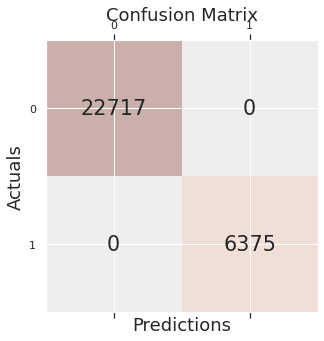

In [50]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [51]:
print('F1 Score: %.3f' % f1_score(y_test, y_test_hat))

F1 Score: 1.000


In [52]:
print( accuracy_score(y_val, y_val_hat))
print( accuracy_score(y_test, y_test_hat))

1.0
1.0


Okazuje się zatem, że wszystkie Classifiery dają idealną predykcję danych.

## Wnioski
Nie ma zbytnio jak wybrać w tym przypadku najlepszego klasyfikatora - zasadniczo wszystkie daję idealną predykcję. Jeżeli jednak byłoby to konieczne, w tym przypadku można unikać GradientBoostingClassifier, gdyż potrzeba najwięcej czasu by go uruchommić